In [16]:
import pandas as pd
import numpy as np
import os 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

Encontrar o diretório do script

# Leitura de dados

In [17]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Pre-processamento de dados

## Tratamento dos valores faltantes

In [19]:
# Preenche valores faltantes na coluna 'Age' com a mediana (tanto no treino quanto no teste)
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

# No conjunto de teste, a coluna 'Fare' pode ter valores faltantes – preenche com a mediana
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# Para a coluna 'Embarked' no conjunto de treino, preenche com o valor mais frequente (moda)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

C:\Users\kino1\AppData\Local\Temp\ipykernel_119412\432446714.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
C:\Users\kino1\AppData\Local\Temp\ipykernel_119412\432446714.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

## Conversão dos valores para numéricos

In [20]:
# Converte a coluna 'Sex': mapeia "male" para 0 e "female" para 1
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
test_df["Sex"] = test_df["Sex"].map({"male": 0, "female": 1})

In [21]:
# Converte a coluna 'Embarked' mapeando os valores: S -> 0, C -> 1 e Q -> 2
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train_df["Embarked"] = train_df["Embarked"].map(embarked_mapping)
test_df["Embarked"] = test_df["Embarked"].map(embarked_mapping)

# Seleção das variáveis úteis para o modelo

In [22]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [23]:
# Define X (variáveis independentes) e y (variável alvo) do conjunto de treino
X = train_df[features]
y = train_df["Survived"]

# Divisão do conjunto entre treino e teste

In [24]:
# Divide os dados de treino em conjunto de treino e validação (80% treino e 20% validação)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento da DT

### Máximo de 3 níveis

In [25]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42, criterion="gini")
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

# Avaliação do conjunto

In [26]:
# Realiza predições no conjunto de validação
y_val_pred = clf.predict(X_val)

# Calcula a acurácia e exibe a matriz de confusão
acc = accuracy_score(y_val, y_val_pred)
print("\nAcurácia na validação:", acc)
print("Matriz de confusão:")
print(confusion_matrix(y_val, y_val_pred))


Acurácia na validação: 0.7988826815642458
Matriz de confusão:
[[92 13]
 [23 51]]


# Visualização da árvore

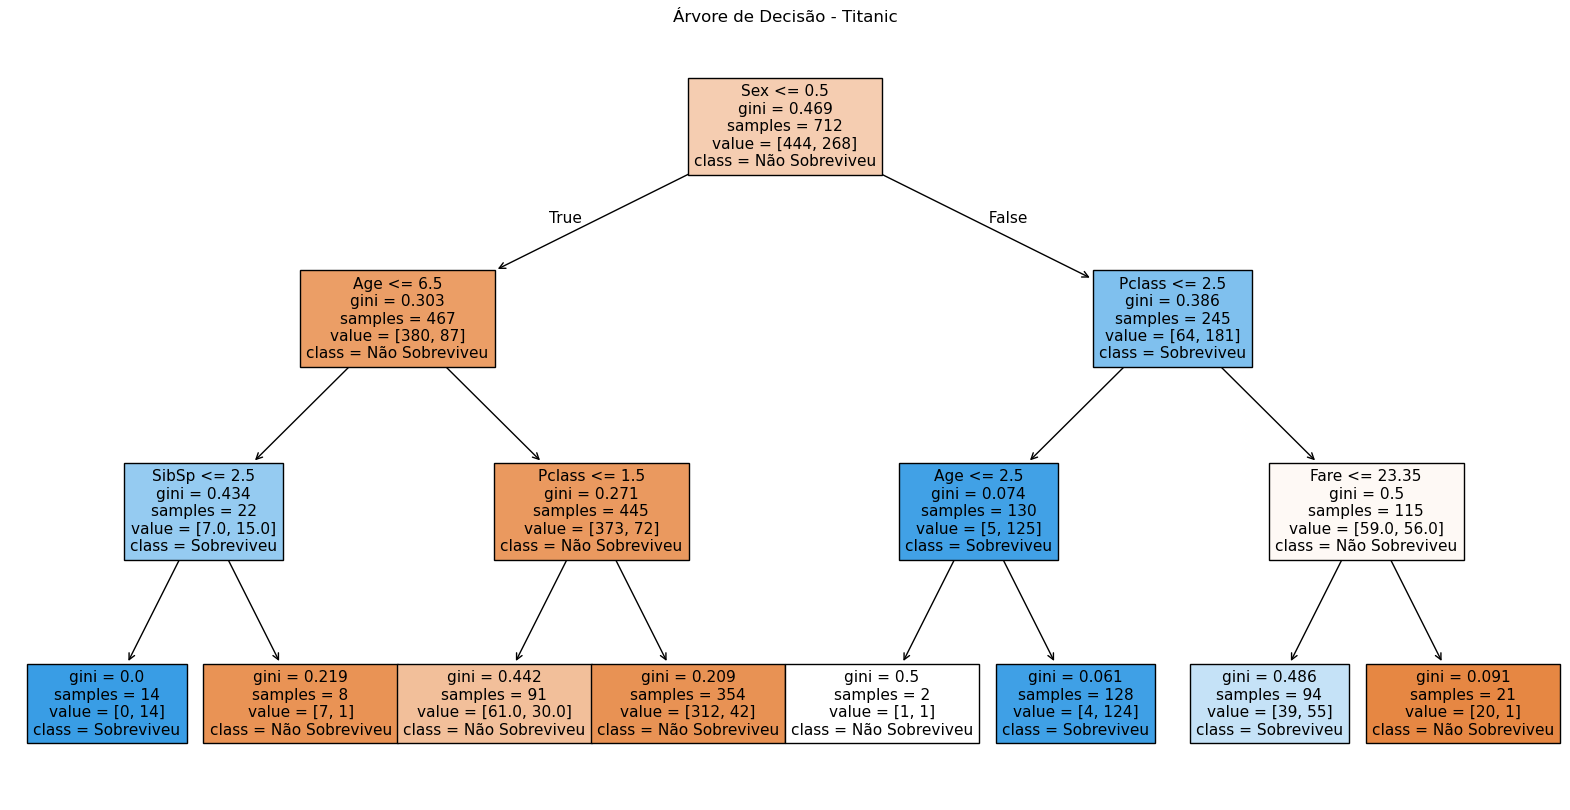

In [27]:
# Plota a árvore de decisão para visualização dos critérios de decisão
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=["Não Sobreviveu", "Sobreviveu"], filled=True)
plt.title("Árvore de Decisão - Titanic")
plt.show()

# Precisão do conjunto

In [28]:
test_pred = clf.predict(test_df[features])

# Cria o DataFrame para submissão conforme o formato exigido (PassengerId e Survived)
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": test_pred
})

In [33]:
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(precision)
print(f1)
print(recall)

print(confusion_matrix(y_val, y_val_pred))


0.796875
0.7391304347826086
0.6891891891891891
[[92 13]
 [23 51]]


In [30]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
